## __Original Data (Population)__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

# Original Data
population = np.random.normal(loc=30, scale=5, size=50000)

print(f"Size of the Original Dataset: {len(population)}")
print(f"Population's mean: {np.mean(population):.2f}")
print(f"Population's standard deviation: {np.std(population):.2f}")

Size of the Original Dataset: 50000
Population's mean: 30.00
Population's standard deviation: 5.00


## __Bootstrap Sampling__

In [6]:
n_bootstrap = 1000
bootstrap_means = []
bootstrap_stds = []

bootstrap_sample_size = 50000

for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(population, size=bootstrap_sample_size, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
    bootstrap_stds.append(np.std(bootstrap_sample))

## __Visualization__

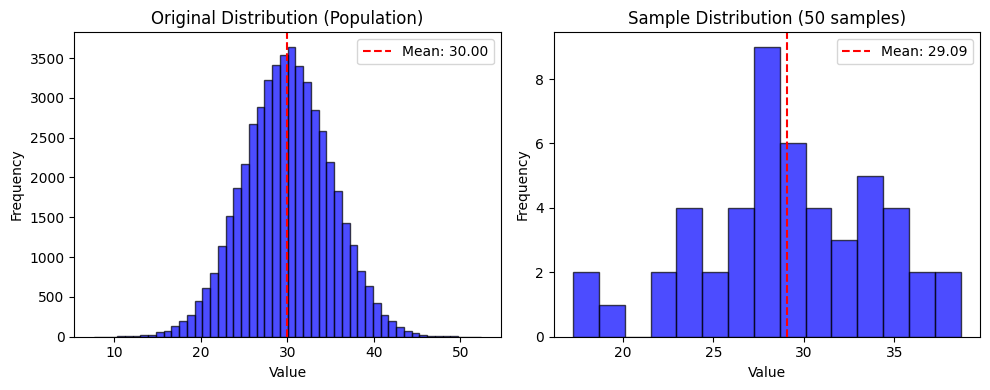

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Original distribution
axes[0].hist(population, bins=50, alpha=0.7, color="blue", edgecolor="black")
axes[0].axvline(np.mean(population), color="red", linestyle="--", label=f"Mean: {np.mean(population):.2f}")
axes[0].set_title("Original Distribution (Population)")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")
axes[0].legend()


# Sample distribution
sample = np.random.choice(population, size = 50)
axes[1].hist(sample, bins=15, alpha=0.7, color="blue", edgecolor="black")
axes[1].axvline(np.mean(sample), color="red", linestyle="--", label=f"Mean: {np.mean(sample):.2f}")
axes[1].set_title("Sample Distribution (50 samples)")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.savefig("./figures/data_distribution.png")
plt.show()


95% confidence interval for the mean: [29.96, 30.04]
95% confidence interval for the standard deviation: [4.97, 5.03]


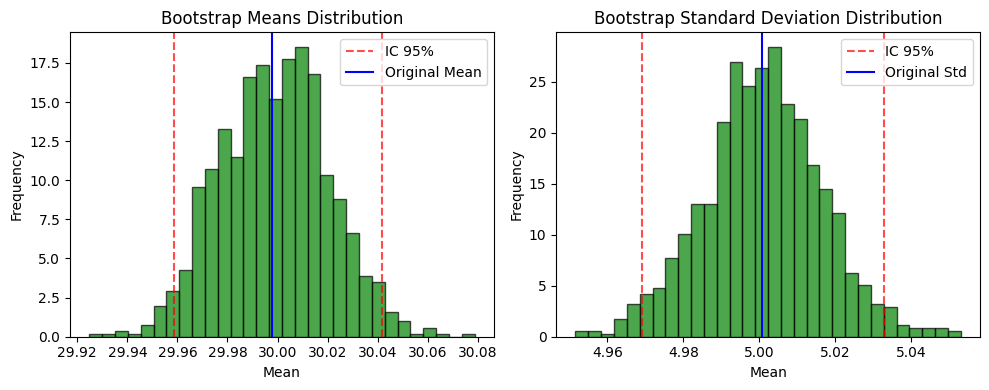

In [4]:
# Confidence Interval
ci_lower_mean = np.percentile(bootstrap_means, 2.5)
ci_upper_mean = np.percentile(bootstrap_means, 97.5)
ci_lower_std = np.percentile(bootstrap_stds, 2.5)
ci_upper_std = np.percentile(bootstrap_stds, 97.5)

print(f"\n95% confidence interval for the mean: [{ci_lower_mean:.2f}, {ci_upper_mean:.2f}]")
print(f"95% confidence interval for the standard deviation: [{ci_lower_std:.2f}, {ci_upper_std:.2f}]")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# Distribución de medias bootstrap
axes[0].hist(bootstrap_means, bins=30, alpha=0.7, color="green", edgecolor="black", density=True)
axes[0].axvline(ci_lower_mean, color="red", linestyle="--", alpha=0.7, label="IC 95%")
axes[0].axvline(ci_upper_mean, color="red", linestyle="--", alpha=0.7)
axes[0].axvline(np.mean(population), color="blue", linestyle="-", label="Original Mean")
axes[0].set_title("Bootstrap Means Distribution")
axes[0].set_xlabel("Mean")
axes[0].set_ylabel("Frequency")
axes[0].legend()

axes[1].hist(bootstrap_stds, bins=30, alpha=0.7, color="green", edgecolor="black", density=True)
axes[1].axvline(ci_lower_std, color="red", linestyle="--", alpha=0.7, label="IC 95%")
axes[1].axvline(ci_upper_std, color="red", linestyle="--", alpha=0.7)
axes[1].axvline(np.std(population), color="blue", linestyle="-", label="Original Std")
axes[1].set_title("Bootstrap Standard Deviation Distribution")
axes[1].set_xlabel("Mean")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.savefig("./figures/bootstrap_distribution.png")
plt.show()